In [14]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git

fatal: destination path 'CIFAR-10-images' already exists and is not an empty directory.


# Classifying CIFAR10 Dataset Using KNN Algorithm

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math 
import os
import cv2
import random

## Importing Train Data

In [16]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

train_data=[]

for Class in classes:
    path=os.path.join('/content/CIFAR-10-images/train',Class)
    class_num=classes.index(Class) 
    
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            train_data.append([img_array,class_num]) 
        except Exception as e:  
            pass
            
print(len(train_data))

100%|██████████| 5000/5000 [00:00<00:00, 14859.39it/s]

50000


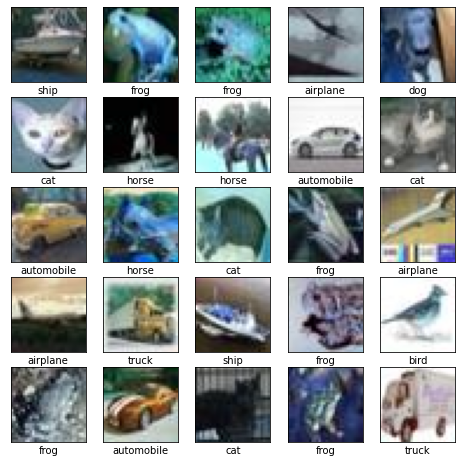

In [17]:
random.shuffle(train_data)
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i][0])
    plt.xlabel(classes[train_data[i][1]])
plt.show()

## Importing Test Data

In [18]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

test_data=[]

for c in classes:
    path=os.path.join('/content/CIFAR-10-images/test',c)
    class_num=classes.index(c) 
    
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            
            test_data.append([img_array,class_num]) 
        except Exception as e:  
            pass
            
print(len(test_data))

100%|██████████| 1000/1000 [00:00<00:00, 14851.09it/s]

10000


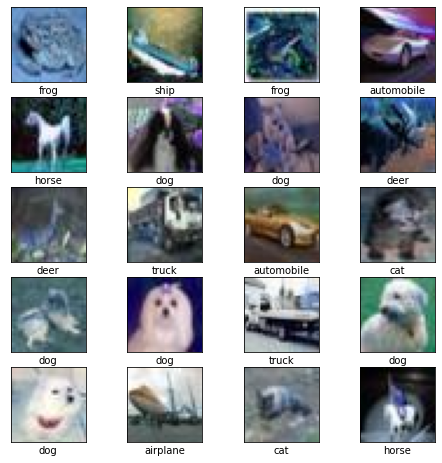

In [19]:
random.shuffle(test_data)
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i][0])
    plt.xlabel(classes[test_data[i][1]])
plt.show()

## Manhanttan Distance Calculation

In [20]:
def manhanttan_distance(test,k):    
    x=[]

    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                print(classes[train_data[i][1]])
                break

# Prediction on a single test image

In [21]:
def manhanttan_distance_accuracy(test,k):    
    x=[]
    prediction_array = []
    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                prediction_array.append(train_data[i][1])
                break

    
    check = []
    for i in range(0, len(classes)):
        a = 0
        for j in range(0, k):
            if i == prediction_array[j]:
                a = a+1
        check.append(a)
            
    for final_prediction in range(0,len(classes)):
        if check[final_prediction] == max(check):
            return final_prediction

Predicted result: airplane
Correct result: airplane


Text(0.5, 0, 'airplane')

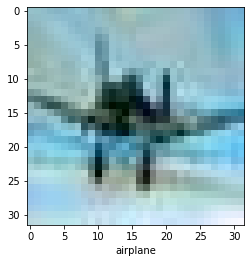

In [22]:
Single_Prediction = manhanttan_distance_accuracy(test_data[8110][0],5)
print('Predicted result: ' + classes[Single_Prediction])
print('Correct result: ' + classes[test_data[8110][1]])
plt.imshow(test_data[8110][0],cmap=plt.cm.gray)
plt.xlabel(classes[test_data[8110][1]])

## Accuracy for Different K values (K = 3)

In [23]:
def single_accuracy(k, test_data_number):
    print('k= '+str(k))
    accuracy_count = 0
    for j in tqdm(range(0, test_data_number)): 
        if manhanttan_distance_accuracy(test_data[j][0], k) == test_data[j][1]:
            accuracy_count = accuracy_count + 1
            

    accuracy = (accuracy_count*100)/(j+1) 
    
    print('******************************************************')
    print('Accuracy for k = '+ str(k) +' is '+ str(accuracy))
    print('*******************************************************')
    
    return accuracy

In [ ]:
k = 2
accuracy_array = []
for i in range(0, k):  
    accuracy_array.append(single_accuracy(i+1, len(test_data)))

k= 1


100%|██████████| 10000/10000 [2:49:18<00:00,  1.02s/it]


******************************************************
Accuracy for k = 1 is 24.33
*******************************************************
k= 2


 89%|████████▉ | 8928/10000 [3:22:30<20:31,  1.15s/it]

In [ ]:
print(accuracy_array)

In [ ]:
k_array = list(range(1, k+1))
print(k_array)

## Accuracy VS K Graph

In [ ]:
plt.xlabel(' K')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy VS K Graph')
plt.plot(k_array, accuracy_array)